# Scikit-learn

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, 100)

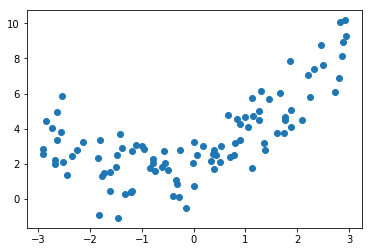

In [3]:
plt.scatter(X, y)
plt.show()

In [4]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_predict = lin_reg.predict(X)

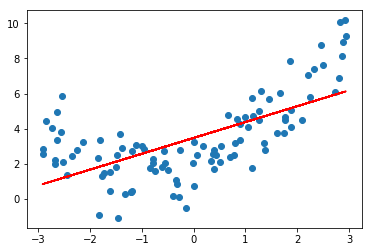

In [5]:
plt.scatter(X, y)
plt.plot(X, y_predict, color='r')
plt.show()

In [6]:
X2 = np.hstack([X, X ** 2]) #add X**2 column
X2.shape

(100, 2)

In [7]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)
y_predict2 = lin_reg2.predict(X2)

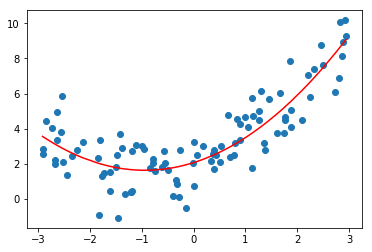

In [8]:
plt.scatter(X, y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color='r')
plt.show()
# x is sortable, X reshaped to (1, 100) is

### Get weights of x and x^2

In [9]:
lin_reg2.coef_ 

array([0.9310466 , 0.49524679])

### Get bias

In [10]:
lin_reg2.intercept_

2.067787767894049

# PolynomialFeatures

In [11]:
from sklearn.preprocessing import PolynomialFeatures

In [12]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)
X2.shape

(100, 3)

In [13]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)
y_predict2 = lin_reg2.predict(X2)

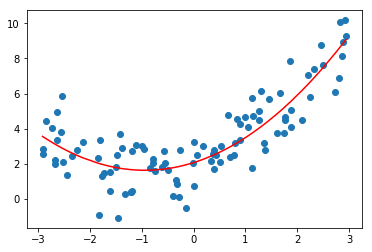

In [14]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color='r')
plt.show()

In [15]:
print(lin_reg2.coef_)
print(lin_reg2.intercept_)

[0.         0.9310466  0.49524679]
2.067787767894049


## Learning Curve

In [16]:
np.random.seed(123)
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, size=100)

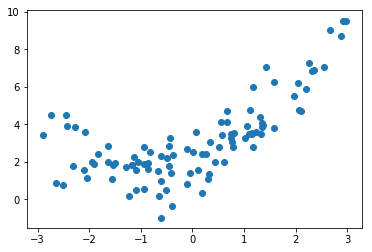

In [17]:
plt.scatter(x, y)
plt.show()

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)
print(X_train.shape)
print(X_test.shape)

(75, 1)
(25, 1)


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

train_score = []
test_score = []
for i in range(1, 76):
    lin_reg = LinearRegression()
    lin_reg.fit(X_train[:i], y_train[:i])
    
    y_train_predict = lin_reg.predict(X_train[:i])
    train_score.append(mean_squared_error(y_train[:i], y_train_predict))
    
    y_test_predict = lin_reg.predict(X_test)
    test_score.append(mean_squared_error(y_test, y_test_predict))

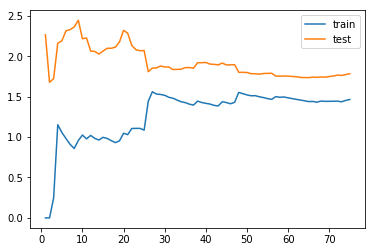

In [20]:
plt.plot([i for i in range(1, 76)], np.sqrt(train_score), label='train')
plt.plot([i for i in range(1, 76)], np.sqrt(test_score), label='test')
plt.legend()
plt.show()

### How to use Pipeline

In [21]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, 100)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

poly_reg = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('std_scaler', StandardScaler()),
    ('lin_reg', LinearRegression())
])

In [22]:
poly_reg.fit(X, y)
y_predict = poly_reg.predict(X)

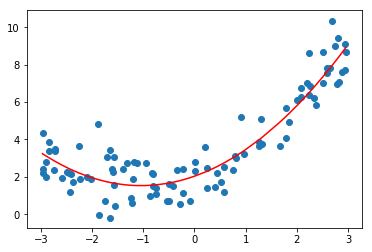

In [23]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()

# Overfitting and Underfitting

if we let degree equal to 20, let's see what will happen

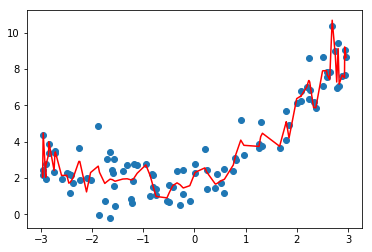

In [24]:
poly_reg = Pipeline([
    ('poly', PolynomialFeatures(degree=100)),
    ('std_scaler', StandardScaler()),
    ('lin_reg', LinearRegression())
])
poly_reg.fit(X, y)
y_predict = poly_reg.predict(X)
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()

In [25]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y, y_predict)

0.5090547043242323

# Winequality Polynormial Linear  Regression

In [26]:
import pandas as pd
path = '../Homework/wine-quality/winequality-red.csv'
features = ['fixed acidity', 'volatile acidity', 'citric acid',
           'residual sugar', 'chlorides', 'free sulfur dioxide',
           'total sulfur dioxide', 'density', 'pH', 'sulphates',
           'alcohol', 'quality']
data = pd.read_csv(path, header=None, names=features, sep=';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [27]:
X = data.iloc[:,0:-1]
X.head()
y = data.iloc[:,-1:]
y.head()


,quality
0,5
1,5
2,5
3,6
4,5


In [28]:
X = X.values
y = y.values
def normalize(X, y):
    X = np.array(X)
    y = np.array(y)
    y = y.reshape((len(y), 1))
    X_shape = X.shape
    for j in range(0, X_shape[1]):
        _mean = np.mean(X[:, j])
        _max = np.max(X[:, j])
        _min = np.min(X[:, j])
        #         print('hhhh', X[:, j])
        #         print(_mean, _max, _min)
        X[:, j] -= _mean
        X[:, j] /= (_max - _min)
    #         print('jjjj', X[:, j])
    _mean = np.mean(y)
    _max = np.max(y)
    _min = np.min(y)
    y = y.astype('float64')
    y[0, :] -= _mean
    y[0, :] /= (_max - _min)
#     X = X.tolist()
#     y = y.ravel().tolist()
    return X, y
X, y = normalize(X, y)

In [29]:
print(X.shape)
poly = PolynomialFeatures(degree=1)
poly.fit(X)
X = poly.transform(X)
print(X.shape)

(1599, 11)
(1599, 12)


In [30]:
# linear_wine = LinearRegression()
# linear_wine.fit(X, y)

In [31]:
# y_predict = linear_wine.predict(X)

In [32]:
# y = y.ravel()
# y_predict = y_predict.ravel()
# # print(y_predict)
# mean_squared_error(y, y_predict)

# Train and Test data Split

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [34]:
linear_wine = LinearRegression()
linear_wine.fit(X_train, y_train)
y_test_predict= linear_wine.predict(X_test)

In [35]:
mean_squared_error(y_test, y_test_predict)

0.5370588324586962

## Validation and Cross Validation

In [36]:
from sklearn import datasets

In [37]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=666)

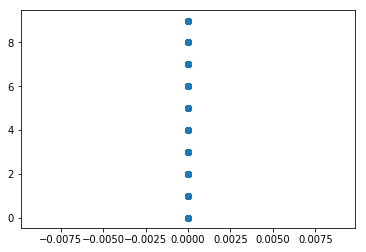

In [39]:
plt.scatter(X_train[:, 0], y_train)
plt.show()

## KNN Fit

In [40]:
from sklearn.neighbors import KNeighborsClassifier

best_k, best_p, best_score = 0, 0, 0
for k in range(2, 11):
    for p in range(1, 6):
        knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=k, p=p)
        knn_clf.fit(X_train, y_train)
        score = knn_clf.score(X_test, y_test)
        if score > best_score:
            best_k, best_p, best_score = k, p, score

print("Best K =", best_k)
print("Best P =", best_p)
print("Best Score =", best_score)

Best K = 3
Best P = 4
Best Score = 0.9860917941585535


In [41]:
best_knn_clf = KNeighborsClassifier(weights="distance", n_neighbors=best_k, p=best_p)
best_knn_clf.fit(X_train, y_train)
best_knn_clf.score(X_test, y_test)

0.9860917941585535

## Cross Validation

In [42]:
from sklearn.model_selection import cross_val_score

knn_clf = KNeighborsClassifier()
cross_val_score(knn_clf, X_train, y_train, cv=10) #cv is the cv fold

array([1.        , 1.        , 0.99099099, 0.97247706, 1.        ,
       0.96226415, 0.97169811, 0.99047619, 0.97142857, 0.98058252])

## Grid Search 

In [43]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {
        'weights': ['distance'],
        'n_neighbors': [_i for _i in range(2, 11)],
        'p': [_i for i in range(1, 6)]
    }
]

grid_search = GridSearchCV(knn_clf, param_grid, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 45 candidates, totalling 135 fits


TypeError: '<' not supported between instances of 'str' and 'int'

In [44]:
grid_search.best_score_

AttributeError: 'GridSearchCV' object has no attribute 'best_score_'

In [ ]:
grid_search.best_params_

In [ ]:
best_knn_clf = grid_search.best_estimator_
best_knn_clf.score(X_test, y_test)

## Ridge Regression

In [45]:
np.random.seed(42)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x + 3 + np.random.normal(0, 1, size=100)

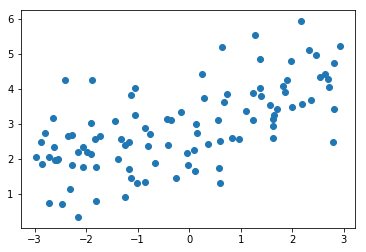

In [46]:
plt.scatter(x, y)
plt.show()

In [47]:
from sklearn.linear_model import Ridge

def RidgeRegression(degree, alpha):
    return Pipeline([
        ('Poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('ridge_reg', Ridge(alpha=alpha)),
    ])

In [48]:
ridge_reg = RidgeRegression(2, 0.001)
ridge_reg.fit(X_train, y_train)

y_predict = ridge_reg.predict(X_test)
mean_squared_error(y_test, y_predict)

11.497015451226353

## LASSO Regression

In [50]:
np.random.seed(123)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x + 3 + np.random.normal(0, 1, size=100)

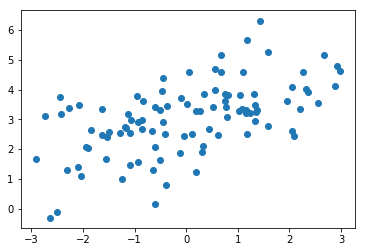

In [51]:
plt.scatter(x, y)
plt.show()

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [53]:
from sklearn.linear_model import Lasso

def LassoRegression(degree, alpha):
    res = Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lasso_reg", Lasso(alpha=alpha))
    ])
    return res

In [55]:
lasso_reg = LassoRegression(2, 0.01)
lasso_reg.fit(X_train, y_train)

y_test_predict = lasso_reg.predict(X_test)
mean_squared_error(y_test, y_test_predict)

0.6993956214015327

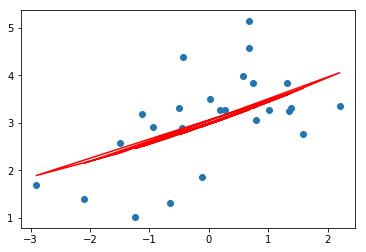

In [57]:
plt.scatter(X_test, y_test)
plt.plot(X_test[:, 0], y_test_predict, color='r')
plt.show()